In [1]:
import pandas as pd
import numpy as np

In [4]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew 
from scipy.stats import shapiro #for checking for skewed data - Shapiro Wilks Test
import matplotlib
import seaborn as sns

In [195]:
uni =pd.read_csv('UNI.csv')
uni.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [196]:
unitest = pd.read_csv('unitest_1.csv')
unitest.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,1,514396,881378,3,115717,3,4,10,144,70,117
1,2,654594,749943,7,135999,1,2,13,161,51,70
2,3,559836,865594,4,142651,1,6,10,184,116,72
3,4,523784,870895,5,57223,4,2,14,170,76,102
4,5,547534,824478,4,51927,5,6,9,162,53,71


In [5]:
uni.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [6]:
unitest.isnull().sum()# no null values in the dataset.

v.id           0
on road old    0
on road now    0
years          0
km             0
rating         0
condition      0
economy        0
top speed      0
hp             0
torque         0
dtype: int64

In [7]:
shapiro(uni['current price'])[1]#if the value is < 0.05 then it is skewed i.e. Not Normal.

2.516952792019911e-11

In [8]:
# To calculate skewedness of all the columns , we use Fisher Pearson Standard Moment Co-efficient
num_feats = uni.dtypes[uni.dtypes!= 'object'].index # determine index for continuous variables
skew_feats = uni.skew().sort_values(ascending = False)# calculate skewness & sort descending
skewness = pd.DataFrame({'skew': skew_feats})

In [9]:
skewness

,skew
top speed,0.064535
current price,0.025161
hp,0.023485
on road now,0.003296
v.id,0.000000
rating,-0.004806
torque,-0.005675
km,-0.022624
years,-0.029663
condition,-0.060334


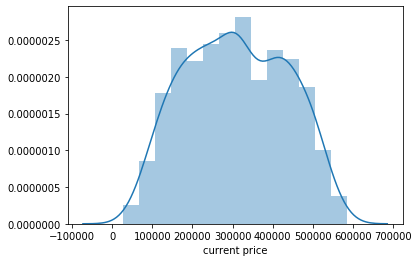

In [10]:
resp = uni['current price']
sns.distplot(resp)

In [12]:
#skewness and kurtosis
print("Skewness: %f" % uni['current price'].skew())#log transformation is usually good for positive skewedness
print("Kurtosis: %f" % uni['current price'].kurt())#tail

Skewness: 0.025161
Kurtosis: -0.973185


In [14]:
#correlation in data
corr=uni.corr()["current price"]
corr[np.argsort(corr, axis=0)[::-1]]

current price    1.000000
on road now      0.282793
on road old      0.233035
condition        0.110108
rating           0.035038
hp               0.030238
torque          -0.002290
years           -0.011854
top speed       -0.027993
economy         -0.034711
v.id            -0.059460
km              -0.935924
Name: current price, dtype: float64

Now we Standardize features by removing the mean and scaling to unit variance

In [197]:
target = uni['current price']
uni.drop(['current price'], axis =1, inplace =True)
#standardizing data
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
 # Don't cheat - fit only on training data
scaler.fit(uni)  
uni = scaler.transform(uni)  
# apply same transformation to test data
unitest = scaler.transform(unitest)  

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


 mu = 308520.24 and sigma = 126010.21



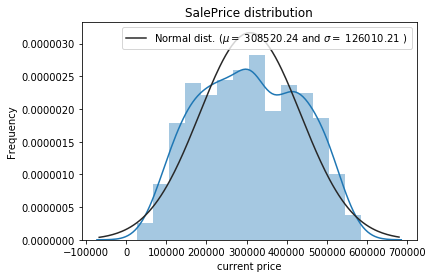

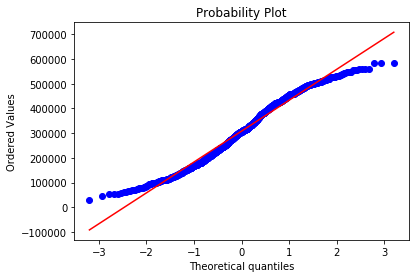

In [20]:
#analysis on the target variable
import matplotlib.pyplot as plt
sns.distplot(uni['current price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(uni['current price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot

fig = plt.figure()
res = stats.probplot(uni['current price'], plot=plt)
plt.show()


 mu = 12.54 and sigma = 0.49



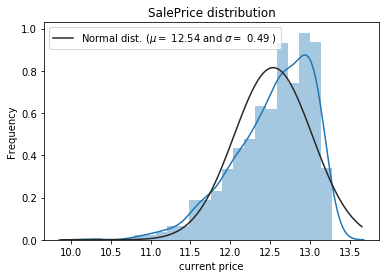

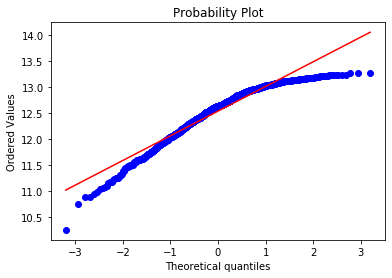

In [21]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
uni['current price'] = np.log1p(uni['current price'])

#Check the new distribution 
sns.distplot(uni['current price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(uni['current price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(uni['current price'], plot=plt)
plt.show()

We can see the distribution deviates from normal distribution. Also no categorical variables

In [23]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

LASSO Regression : This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [30]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0001, random_state=1))


In [31]:
lasso2 = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [32]:
lasso3 = make_pipeline(RobustScaler(), Lasso(alpha =0.0010, random_state=1))


In [109]:
lasso35 = make_pipeline(RobustScaler(), Lasso(alpha =0.0013, random_state=1))

In [33]:
lasso4 = make_pipeline(RobustScaler(), Lasso(alpha =0.0015, random_state=1))


In [110]:
lasso45 = make_pipeline(RobustScaler(), Lasso(alpha =0.0020, random_state=1))

In [105]:
lasso5 = make_pipeline(RobustScaler(), Lasso(alpha =0.0025, random_state=1))

In [106]:
lasso6 = make_pipeline(RobustScaler(), Lasso(alpha =0.0036, random_state=1))

In [48]:
target = uni['current price']

In [79]:
uni.drop(['current price'], axis =1, inplace =True)

In [194]:
uni.shape

(1000, 11)

In [81]:
uni.head(3)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,1,535651,798186,3,78945,1,2,14,177,73,123
1,2,591911,861056,6,117220,5,9,9,148,74,95
2,3,686990,770762,2,132538,2,8,15,181,53,97


In [199]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(uni)
    rmse= np.sqrt(-cross_val_score(model, uni, target,scoring="neg_mean_squared_error", cv=5))
    return(rmse)

In [54]:
np.sqrt(-cross_val_score(lasso, uni, target,scoring="neg_mean_squared_error", cv=5))

array([-1.52623244e-08, -2.50125761e-08, -1.78566013e-08, -1.89797167e-08,
       -2.43356243e-08])

In [53]:
cross_val_score(lasso2, uni, target, cv=5)

array([0.99999802, 0.99999775, 0.99999798, 0.99999794, 0.99999772])

In [205]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.20f} ({:.20f})\n".format(score.mean(), score.std()))


Lasso score: 8814.25682285058792331256 (213.49935868081726653145)



In [204]:
score = rmsle_cv(lasso2)
print("\nLasso score: {:.20f} ({:.20f})\n".format(score.mean(), score.std()))


Lasso score: 8814.25673297192588506732 (213.49938490166209703602)



In [203]:
score = rmsle_cv(lasso3)
print("\nLasso score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


Lasso score: 8814.2566053447 (213.4994208021)



In [202]:
score = rmsle_cv(lasso35)
print("\nLasso score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


Lasso score: 8814.2565289906 (213.4994375581)



In [201]:
score = rmsle_cv(lasso4)
print("\nLasso score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


Lasso score: 8814.2564780882 (213.4994487288)



In [200]:
score = rmsle_cv(lasso45)#########################################Lowest error 
print("\nLasso score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


Lasso score: 8814.2563508327 (213.4994766555)



In [206]:
lasso455 = make_pipeline(RobustScaler(), Lasso(alpha =0.0022, random_state=1))
score = rmsle_cv(lasso455)
print("\nLasso score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


Lasso score: 8814.2562999308 (213.4994878262)



In [238]:
score = rmsle_cv(lasso5)
print("\nLasso score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


Lasso score: 8814.2562235782 (213.4995045821)



In [239]:
score = rmsle_cv(lasso6)
print("\nLasso score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


Lasso score: 8814.2559436220 (213.4995660207)



Elastic Net Regression : again made robust to outliers

In [207]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("\nElastic Net score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


Elastic Net score: 8814.2656371634 (213.4973560382)



In [208]:
ENet2 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.7, random_state=3))
score = rmsle_cv(ENet2)
print("\nElastic Net score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))#higher error


Elastic Net score: 8814.4091416080 (213.5040134667)



In [209]:
ENet3 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.95, random_state=3))
score = rmsle_cv(ENet3)
print("\nElastic Net score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


Elastic Net score: 8814.2559437075 (213.4979185620)



In [210]:
ENet4 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.98, random_state=3))
score = rmsle_cv(ENet4)
print("\nElastic Net score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


Elastic Net score: 8814.2551590338 (213.4986894905)



In [211]:
ENet5 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.99, random_state=3))
score = rmsle_cv(ENet5)
print("\nElastic Net score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


Elastic Net score: 8814.2557362720 (213.4990190155)



In [212]:
ENet6 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.995, random_state=3))
score = rmsle_cv(ENet6)
print("\nElastic Net score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


Elastic Net score: 8814.2561821869 (213.4991974102)



In [213]:
ENet61 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0010, l1_ratio=.995, random_state=3))
score = rmsle_cv(ENet61)
print("\nElastic Net score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


Elastic Net score: 8814.2556089103 (213.4990548283)



In [214]:
ENet62 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0015, l1_ratio=.995, random_state=3))
score = rmsle_cv(ENet62)
print("\nElastic Net score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))
#LOWEST E NET #################################################################################################


Elastic Net score: 8814.2551411563 (213.4989132724)



In [215]:
ENet52 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0015, l1_ratio=.99, random_state=3))
score = rmsle_cv(ENet52)
print("\nElastic Net score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))
#######################new lowest


Elastic Net score: 8814.2547479702 (213.4984595701)



In [236]:
ENet62 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0025, l1_ratio=.995, random_state=3))
score = rmsle_cv(ENet62)
print("\nElastic Net score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))#increasing error


Elastic Net score: 8814.2545210670 (213.4986571369)



In [216]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [217]:
score = rmsle_cv(KRR)
print("\n KRRt score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))

#################################################3new lowest


 KRRt score: 3166.8236555969 (158.9255338896)



In [218]:
# changing alpha didn't have much affect
KRR2 = KernelRidge(alpha=0.4, kernel='polynomial', degree=2, coef0=1.5)
score = rmsle_cv(KRR2)
print("\n KRRt score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))
####lowesstttttttttttttttttttttttttt


 KRRt score: 3109.9927307732 (152.9985283221)



In [219]:
KRR3 = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=3.5)
score = rmsle_cv(KRR3)
print("\n KRRt score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))
########################################################################Lowest KRR


 KRRt score: 3160.9088453538 (154.8472817226)



In [128]:
KRR4 = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=4.5)
score = rmsle_cv(KRR4)
print("\n KRRt score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


 KRRt score: 0.1215785523 (0.0545950763)



In [237]:
KRR5 = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=4)
score = rmsle_cv(KRR5)
print("\n KRRt score: {:.10f} ({:.10f})\n".format(score.mean(), score.std()))


 KRRt score: 3159.7564597246 (153.6083449181)



Gradient Boosting Regression : With huber loss that makes it robust to outliers

In [220]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
# high training time BEST GBOOST############################################################################################

In [221]:
scoregb = rmsle_cv(GBoost)
print("\n GBoost score: {:.20f} ({:.10f})\n".format(scoregb.mean(), scoregb.std()))
# error reduced almost to half. Significant Training time


 GBoost score: 12158.40202511198367574252 (335.6826478246)



In [154]:
GBoost2 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)#changing max depth

In [230]:
scoregb2 = rmsle_cv(GBoost2)
print("\n GBoost score: {:.20f} ({:.10f})\n".format(scoregb2.mean(), scoregb.std()))
# Higher error. Significant Training time


 GBoost score: 13897.70001075114669220056 (335.6826478246)




 GBoost score: 0.06331070518483231102 (0.0134823705)



In [161]:
GBoost4 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=18, min_samples_split=10, 
                                   loss='huber', random_state =5)
scoregb4 = rmsle_cv(GBoost4)
print("\n GBoost score: {:.20f} ({:.10f})\n".format(scoregb4.mean(), scoregb.std()))
# same error. Significant Training time


 GBoost score: 0.05935200754754756114 (0.0134823705)



In [231]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,eval_metric  ='rmse',
                             random_state =7, nthread = -1)

In [232]:
scorexgb = rmsle_cv(model_xgb)
print("\n XGBoost score: {:.30f} ({:.10f})\n".format(scorexgb.mean(), scorexgb.std()))
# slightly worse performance than GBoost. Less training time.


 XGBoost score: 8964.564966873531375313177704811096 (2202.2485375727)



In [233]:
model_xgb2 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.8, silent=1,eval_metric  ='rmse',
                             random_state =7, nthread = -1)
scorexgb2 = rmsle_cv(model_xgb2)
print("\n XGBoost score: {:.30f} ({:.10f})\n".format(scorexgb2.mean(), scorexgb.std()))
# slightly worse performance than GBoost. Less training time.


 XGBoost score: 8736.665388879458987503312528133392 (2202.2485375727)



In [235]:
#increasing max depth
model_xgb3 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=4, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,eval_metric  ='rmse',
                             random_state =7, nthread = -1)
scorexgb3 = rmsle_cv(model_xgb3)
print("\n XGBoost score: {:.30f} ({:.10f})\n".format(scorexgb3.mean(), scorexgb.std()))
#worse 


 XGBoost score: 12694.096660752218667767010629177094 (2202.2485375727)



NOTE######################
Please ignore the GB Regressor scores below as they were obtained when I had scaled the output as well. 

In [240]:
#colsample_bytree increasing
model_xgb3 = xgb.XGBRegressor(colsample_bytree=0.8, gamma=0.0468, 
                             learning_rate=0.05, max_depth=4, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,eval_metric  ='rmse',
                             random_state =7, nthread = -1)
scorexgb3 = rmsle_cv(model_xgb3)
print("\n XGBoost score: {:.30f} ({:.10f})\n".format(scorexgb3.mean(), scorexgb.std()))
#better


 XGBoost score: 8682.162882480211919755674898624420 (2202.2485375727)



In [241]:
#colsample_bytree increasing
model_xgb4 = xgb.XGBRegressor(colsample_bytree=0.9, gamma=0.0468, 
                             learning_rate=0.05, max_depth=4, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,eval_metric  ='rmse',
                             random_state =7, nthread = -1)
scorexgb4 = rmsle_cv(model_xgb4)
print("\n XGBoost score: {:.30f} ({:.10f})\n".format(scorexgb4.mean(), scorexgb.std()))
#better because low no of columns, col by sample needs to be high


 XGBoost score: 7121.969400234665954485535621643066 (2202.2485375727)



In [242]:
#colsample_bytree increasing
model_xgb5 = xgb.XGBRegressor(colsample_bytree=1, gamma=0.0468, 
                             learning_rate=0.05, max_depth=4, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,eval_metric  ='rmse',
                             random_state =7, nthread = -1)
scorexgb5 = rmsle_cv(model_xgb5)
print("\n XGBoost score: {:.30f} ({:.10f})\n".format(scorexgb5.mean(), scorexgb.std()))
#better STILL BETTER  BEST XG Boost ##############################################################################################


 XGBoost score: 7080.372171716368939087260514497757 (2202.2485375727)



In [243]:
#colsample_bytree increasing, decrease learning rate
model_xgb6 = xgb.XGBRegressor(colsample_bytree=1, gamma=0.0468, 
                             learning_rate=0.04, max_depth=4, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,eval_metric  ='rmse',
                             random_state =7, nthread = -1)
scorexgb6 = rmsle_cv(model_xgb6)
print("\n XGBoost score: {:.30f} ({:.10f})\n".format(scorexgb6.mean(), scorexgb.std()))
#better  Worse performance


 XGBoost score: 6966.997691736718479660339653491974 (2202.2485375727)



In [244]:
#colsample_bytree increasing regularisation increased
model_xgb7 = xgb.XGBRegressor(colsample_bytree=1, gamma=1, 
                             learning_rate=0.05, max_depth=4, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,eval_metric  ='rmse',
                             random_state =7, nthread = -1)
scorexgb7 = rmsle_cv(model_xgb7)
print("\n XGBoost score: {:.30f} ({:.10f})\n".format(scorexgb7.mean(), scorexgb.std()))
#very bad 


 XGBoost score: 7080.372171716368939087260514497757 (2202.2485375727)



In [178]:
#colsample_bytree increasing regularisation increased
model_xgb8 = xgb.XGBRegressor(colsample_bytree=1, gamma=.1, 
                             learning_rate=0.05, max_depth=4, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,eval_metric  ='rmse',
                             random_state =7, nthread = -1)
scorexgb8 = rmsle_cv(model_xgb8)
print("\n XGBoost score: {:.30f} ({:.10f})\n".format(scorexgb8.mean(), scorexgb.std()))
#very bad 


 XGBoost score: 0.068836469773775429970008588043 (0.0139501612)



In [245]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=920,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.10f} ({:.10f})\n" .format(score.mean(), score.std()))

LGBM score: 7657.3021222171 (490.1745178886)



In [246]:
model_lgb1 = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=920,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.5,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb1)
print("LGBM score: {:.10f} ({:.10f})\n" .format(score.mean(), score.std()))###BEST EVER RESULTS

LGBM score: 5857.2646217046 (173.0266041954)



In [186]:
model_lgb2 = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=920,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.8,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb2)
print("LGBM score: {:.10f} ({:.10f})\n" .format(score.mean(), score.std()))

LGBM score: 0.0403775988 (0.0093979914)



In [247]:
model_lgb3 = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=920,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.9,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb3)
print("LGBM score: {:.10f} ({:.10f})\n" .format(score.mean(), score.std()))###BEST EVER RESULTS
#####################################################################################################################

LGBM score: 6695.0959880884 (475.6568881552)



In [190]:
model_lgb3.fit(uni, target)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.9, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=920, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [227]:
pred = model_lgb3.predict(unitest)

In [228]:
res = pd.DataFrame()
res['v.id']= unitest['v.id']
res['current price'] = pred
res.to_csv('submission.csv',index=False)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [222]:
KRR2.fit(uni, target)

KernelRidge(alpha=0.4, coef0=1.5, degree=2, gamma=None, kernel='polynomial',
            kernel_params=None)

In [224]:
pred = KRR2.predict(unitest)

In [248]:
unitest.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [226]:
res = pd.DataFrame()
res['v.id']= unitest['v.id']
res['current price'] = pred
res.to_csv('submissionK.csv',index=False)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices